<span style="color:gray;font-size:0.8em">*Updated on: 14/09/2024 (dd/mm/yyyy)*</span><br>
# Exercise (a)
1. Draw histogram for each channel in an image array on the same plot.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

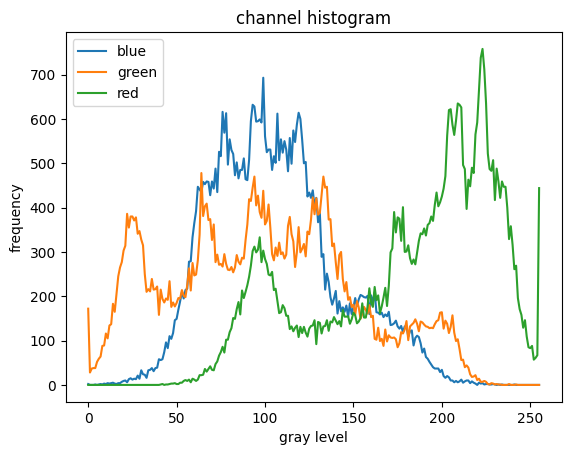

In [4]:
img = cv.imread("images/lena.jfif")
fig, ax = plt.subplots()

for channel in cv.split(img):
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    ax.plot(hist)

ax.set_title("channel histogram")
ax.set_xlabel("gray level")
ax.set_ylabel("frequency")
ax.legend(["blue", "green", "red"])

## Exercise (b)
Try histogram equalization and CLAHE on 'winter.jfif' and display the results together with the original grayscale image. Comment on the results obtained.

In [5]:
from utils import display_images

In [6]:
gray = cv.imread("images/winter_low_contrast.jfif", 0)

# histogram equalization
eq = cv.equalizeHist(gray)
# CLAHE
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(9, 9))
dst = clahe.apply(gray)

display_images([gray, eq, dst], ("grayscale", "equalization", "CLAHE"))

**Comments:** CLAHE typically produces images with better visual quality and detail retention, especially in images with significant variations in intensity, compared to standard histogram equalization.

## Exercise: Drawing functions (c)
1. Draw a bulleye image like what shown below:  
![bulleye](img_embed/bulleye.PNG "bulleye")
2. Draw a finish line image as below:

![finish_line](img_embed/custom_draw.jpg)

# Question 1

In [2]:
from utils import display_image

In [5]:
canva = np.zeros((350, 350), np.uint8)
radii = np.linspace(10, 160, num=10)
center = canva.shape[1] // 2, canva.shape[0] // 2

for r in radii:
    cv.circle(canva, center, int(r), 255, 2)

cv.putText(canva, "Bulleye", (15, 325), cv.FONT_HERSHEY_SIMPLEX, 0.7, 255)

display_image("bulleye", canva)

# Question 2

In [9]:
canva = np.zeros((400, 400, 3), dtype=np.uint8) + 255

cv.rectangle(canva, (50, 50), (90, 350), (150, 150, 150), -1)
cv.rectangle(canva, (310, 50), (350, 350), (150, 150, 150), -1)
cv.rectangle(canva, (90, 50), (310, 150), (255, 0, 0), -1)

cv.putText(canva, "Finish Line", (130, 110), cv.FONT_HERSHEY_SIMPLEX, 0.8, 
          (50, 255, 50), 1, cv.LINE_AA)
display_image("finish line", canva)

### Exercise (d)
Use the image "dice.jfif".

![dice](img_embed/dice_marked.jpg "dice")

Obtain the bird eye view of the region outlined in red with perspective transform.

In [2]:
from utils import display_image
from scipy.spatial.distance import euclidean

In [3]:
img = cv.imread("images/dice.jfif")

# copy image
img_copy = img.copy()
pts = []
window_name = "perspective"

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        pts.append((x, y))
        cv.circle(img_copy, (x, y), 2, (0, 0, 255), -1)
        cv.imshow(window_name, img_copy)

cv.namedWindow(window_name, cv.WINDOW_NORMAL)
cv.imshow(window_name, img_copy)
cv.setMouseCallback(window_name, mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(10, 62)
(79, 95)
(85, 136)
(18, 104)


In [4]:
w1 = euclidean(pts[0], pts[1])
w2 = euclidean(pts[2], pts[3])
w = max(w1, w2)

h1 = euclidean(pts[0], pts[3])
h2 = euclidean(pts[1], pts[2])
h = max(h1, h2)

transform_pts = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])
p_arr = np.float32(pts)

M = cv.getPerspectiveTransform(p_arr, transform_pts)
dst = cv.warpPerspective(img, M, (int(w), int(h)))

display_image("perspective", dst)

# Exercise (e)
1. Turn the white rectangle on dark background to black rectangle on white background.

In [5]:
from utils import display_images

In [8]:
rect = np.zeros((250, 250), np.uint8)
cv.rectangle(rect, (30, 30), (220, 220), 255, -1)
rect_inverse = cv.bitwise_not(rect)

display_images([rect, rect_inverse], ("rect", "inverse"))

# Exercise (f)
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [1]:
# setup
import cv2 as cv
import numpy as np

# Sample solution

# Question 1
## First way: using external package: `imutils`
Remember to `pip install imutils`.

In [4]:
!pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=ff886d3f8775f20b9a8bb864d69dc4e09923fcbdc40f371a2ced265eb97f7a2b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Question 1
#1st way: Utilize external library
from imutils import rotate_bound
img = cv.imread('images/lena.jfif')
rotated = rotate_bound(img, -45)

cv.imshow('rotate', rotated)
cv.waitKey(0)
cv.destroyAllWindows()

## 2nd way: modify the transformation matrix, M

In [4]:
#2nd way: Modify the transformation matrix
# define a custom function
def rotate_image(img, angle, scale):
    """Arguments:
    img: source image
    angle, scale: argument for cv.getRotationMatrix2D
    """
    height, width = img.shape[:2]
    img_center = (int(width/2), int(height/2))
    rotation_mat = cv.getRotationMatrix2D(img_center, angle, scale)
    # result: 2x3 matrix
    abs_cos = abs(rotation_mat[0, 0])
    abs_sin = abs(rotation_mat[1, 0])
    
    new_w = int(abs_sin*height + abs_cos*width)
    new_h = int(abs_cos*height + abs_sin*width)
    
    rotation_mat[0, 2] += new_w/2 - img_center[0]
    rotation_mat[1, 2] += new_h/2 - img_center[1]
    
    rotated_img = cv.warpAffine(img, rotation_mat, (new_w, new_h))
    return rotated_img

rotate_img = rotate_image(img, 45, 1)

cv.imshow('original', img)
cv.imshow('rotate', rotate_img)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 2

In [5]:
img1 = cv.imread('images/native-bee.png')
img2 = cv.imread('images/flower.jfif')

# Add flower on the top left hand corner of the bee image
rows, cols = img2.shape[:2]
roi = img1[:rows, :cols]

# roi is the background; now we need to get the flower
# Lets use image thresholding
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2_gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# get the background (from img1) and foreground (flower from img2)
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

res = cv.add(img1_bg, img2_fg)
img1[:rows, :cols] = res

cv.imshow("flower_bee", img1)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 3

In [6]:
import random

def random_center_crop(image, min_crop_ratio=0.5, max_crop_ratio=0.9):
    height, width = image.shape[:2]

    # randomly choos crop size
    crop_ratio = random.uniform(min_crop_ratio, max_crop_ratio)
    crop_height = int(height * crop_ratio)
    crop_width = int(width * crop_ratio)

    # calculate crop coordinates
    y1 = (height - crop_height) // 2
    y2 = y1 + crop_height
    x1 = (width - crop_width) // 2
    x2 = x1 + crop_width

    # perform the crop
    cropped_image = image[y1:y2, x1:x2]

    return cropped_image

## Question 4
Another type of common image noise is called salt & pepper noise.

In [9]:
img = cv.imread("images/camera.jpg")

rng = np.random.default_rng(0)
prob_mat = rng.uniform(0, 1, size=img.shape[:2])

degree_noise = 0.05
img_noise = img.copy()

# add noise
img_noise[prob_mat <= degree_noise / 2, ...] = (0, 0, 0)
img_noise[prob_mat >= 1 - (degree_noise / 2), ...] = (255, 255, 255)

cv.imshow("original", img)
cv.imshow("salt & pepper noise", img_noise)
cv.waitKey(0)
cv.destroyAllWindows()